# Import des packages

In [2]:
import numpy as np              # linear algebra
import pandas as pd             # data processing, CSV file I/O (e.g. pd.read_csv)
import os                       # files handling
import re
from random import randint, seed
from IPython.display import display
import matplotlib.pyplot as plt
import json
import warnings
import requests
import seaborn as sns
warnings.filterwarnings('ignore')

# Import des données

In [45]:
def load_json_data():

    # Créer une liste vide pour stocker les données JSON de chaque fichier
    data = []
    
    # Charger chaque fichier JSON et stocker ses données dans la liste de données
    for i in range(1,11):
        with open(f"C:/Users/legal/Documents/Personelle/Ecole/EICNAM/Semestre 4/EntreposageFouillesdeDonnees/TP_Note/TP_CHAMPI/json_files/observations_{i}.json") as f:
            json_data = json.load(f)
            if i==1:
                df = pd.DataFrame(json_data)
            else:
                df = df.append(json_data, ignore_index=True)
            
            new_cols = {}

    for i, gbif_info in enumerate(df['gbif_info']):
        # Vérification que la valeur est un dictionnaire
        if isinstance(gbif_info, dict):
            # Parcours de toutes les clés du dictionnaire dans la colonne "gbif_info"
            for col in set().union(*(d.keys() for d in [gbif_info])):
                # Création d'une nouvelle colonne avec le nom de la clé et une liste vide pour stocker les valeurs
                if col not in new_cols:
                    new_cols[col] = [None] * len(df.index)
                
                # Stockage de la valeur correspondante dans la liste de la nouvelle colonne
                new_cols[col][i] = gbif_info.get(col)

    # Fusion des nouvelles colonnes avec le dataframe principal
    df = df.join(pd.DataFrame(new_cols))
    #for i, image_url in enumerate(df['image_url']):
    #    pass
    return df
df= load_json_data()
df.head(3)

,observation,label,image_id,image_url,user,date,gbif_info,thumbnail,location,speciesKey,...,classKey,kingdom,familyKey,rank,synonym,genusKey,phylumKey,canonicalName,orderKey,note
0,24671,Boletus nobilissimus,54745,http://mushroomobserver.org/images/320/54745,290,2009-08-24 02:54:15,"{'kingdom': 'Fungi', 'family': 'Boletaceae', '...",1,2259.0,6015253.0,...,186.0,Fungi,8789.0,SPECIES,False,7241486.0,34.0,Boletus nobilissimus,1063.0,None
1,24671,Boletus nobilissimus,54746,http://mushroomobserver.org/images/320/54746,290,2009-08-24 02:54:15,"{'kingdom': 'Fungi', 'family': 'Boletaceae', '...",0,2259.0,6015253.0,...,186.0,Fungi,8789.0,SPECIES,False,7241486.0,34.0,Boletus nobilissimus,1063.0,None
2,24671,Boletus nobilissimus,54747,http://mushroomobserver.org/images/320/54747,290,2009-08-24 02:54:15,"{'kingdom': 'Fungi', 'family': 'Boletaceae', '...",0,2259.0,6015253.0,...,186.0,Fungi,8789.0,SPECIES,False,7241486.0,34.0,Boletus nobilissimus,1063.0,None


On a un problème avec les urls.

Le Site a changé les chemins des images on passe de

 http://mushroomobserver.org/images/320/54751   

 https://images.mushroomobserver.org/320/54751.jpg

In [46]:
df['image_url'] = df['image_url'].replace('w*$', '.jpg', regex=True) # Ajout du jpg à la fin
df['image_url'] = df['image_url'].replace('mushroomobserver.org/images', 'images.mushroomobserver.org', regex=True) # Changement du chemin

## Permet d'avoir uniquement des champignons avec le status ACCEPTED et confiance >0.95

In [47]:
print(df['confidence'].describe())

count    595580.000000
mean         96.699872
std           2.214475
min          84.000000
25%          94.000000
50%          98.000000
75%          98.000000
max         100.000000
Name: confidence, dtype: float64


In [48]:
df = df.loc[df['confidence'] > 0.95]
df = df.loc[df['status']=='ACCEPTED']

Text(0.5, 1.0, 'Visualisation des valeurs manquantes dans df')

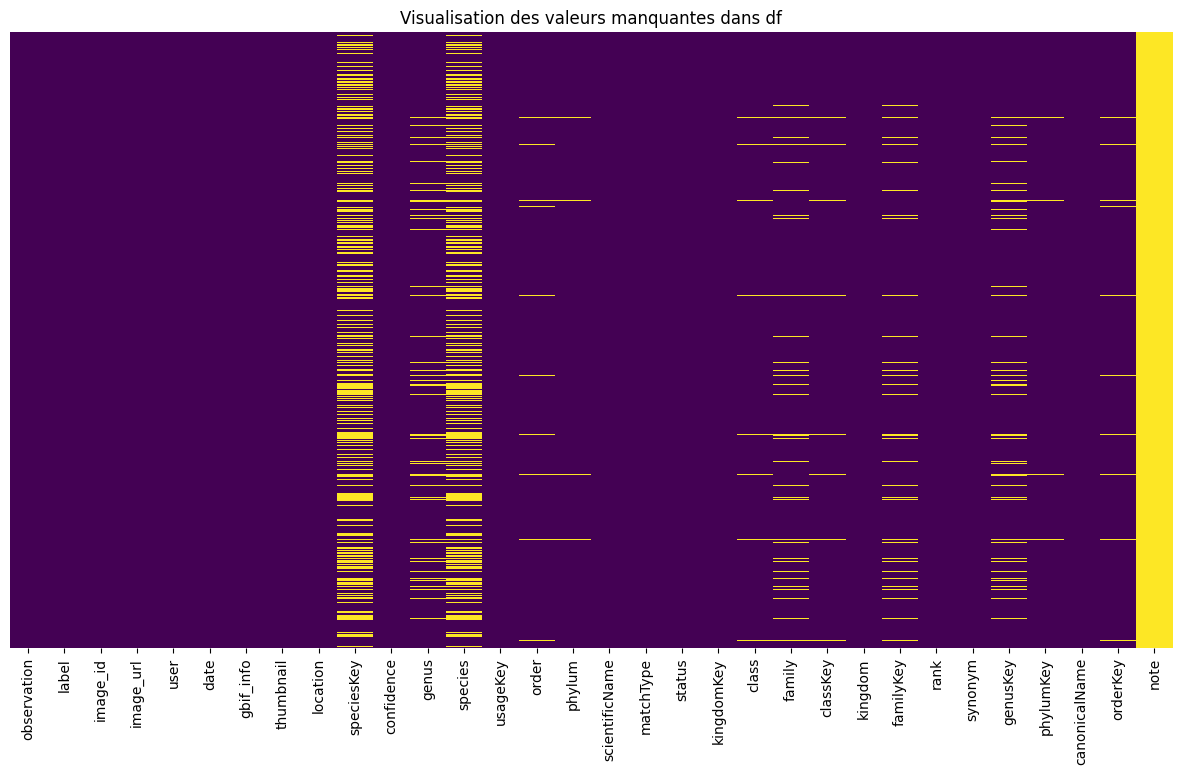

In [49]:
# Instancier une figure de dimension 10,5
plt.figure(figsize=(15, 8))

# Créer une heatmap de seaborn
sns.heatmap(df.isnull(), cmap='viridis', cbar=False, yticklabels=False)

# Ajouter un titre
plt.title('Visualisation des valeurs manquantes dans df')

## Champignon Francais

In [50]:
listfrance = ["Agaricus arvensis","Agaricus augustus","Agaricus campestris","Agaricus silvicola","Agaricus xanthoderma","Agrocybe cylindracea","Albatrellus ovinus","Aleuria aurantia","Amanita caesarea","Amanita citrina","Amanita fulva","Amanita junquillea","Amanita gemmata","Amanita muscaria","Amanita ovoidea","Amanita pantherina","Amanita phalloides","Amanita rubescens","Amanita spissa","Amanita vaginata","Amanita verna","Amanita virosa","Ampulloclitocybe clavipes","Anthurus archeri","Armillaria mellea","Auricularia auricula-judae","Boletus aereus","Boletus aestivalis","Boletus appendiculatus","Boletus calopus","Boletus edulis","Boletus erythropus","Boletus luridus","Boletus pinophilus","Boletus queletii","Boletus satanas","Boletus rhodopurpureus","Boletus aereus","Boletus edulis","Boletus pinophilus","Boletus aestivalis","Boletus aereus","Calocera viscosa","Calocybe gambosa","Calvatia excipuliformis","Calvatia gigantea","Cantharellus cibarius","Chalciporus piperatus","Chlorophyllum rhacodes","Chroogomphus rutilus","Clathrus ruber","Clavariadelphus pistillaris","Clavariadelphus truncatus","Clavulina cristata","Clavulina rugosa","Clitocybe amoenolens","Clitocybe connata","Clitocybe nebularis","Clitocybe odora","Clitopilus prunulus","Coprinellus micaceus","Coprinopsis atramentaria","Coprinopsis picacea","Coprinus comatus","Coprinus disseminatus","Cortinarius alboviolaceus","Cortinarius camphoratus","Cortinarius caperatus","Cortinarius cinnamomeus","Cortinarius orellanus","Cortinarius praestans","Cortinarius speciosissimus","Cortinarius splendens","Cortinarius triumphans","Cortinarius varius","Cortinarius violaceus","Craterellus cinereus","Craterellus cornucopioides","Craterellus lutescens","Craterellus tubaeformis","Daedaleopsis tricolor","Dacrymyces stillatus","Disciotis venosa","Dendropolyporus umbellatus","Entoloma clypeatum","Entoloma sinuatum","Entoloma nitidum","Fuligo septica","Flammulina velutipes","Fistulina hepatica","Galerina marginata","Geastrum fimbriatum","Geastrum triplex","Gomphidius glutinosus","Gomphidius roseus","Gomphus clavatus","Grifola frondosa","Gymnopilus penetrans","Gymnopilus spectabilis","Gymnopus dryophilus","Gymnopus peronatus","Gyromitra esculenta","Gyroporus castaneus","Gyroporus cyanescens","Hebeloma crustuliniforme","Hebeloma laterinum","Hebeloma radicosum","Helvella crispa","Helvella lacunosa","Helvella macropus","Hydnum repandum","Hydnum rufescens","Hygrocybe conica","Hygrocybe pratensis","Hygrocybe virginea","Hygrophoropsis aurantiaca","Hygrophorus agathosmus","Hygrophorus eburneus","Hygrophorus latitabundus","Hygrophorus nemoreus","Hygrophorus russula","Hypholoma fasciculare","Hypholoma lateritium","Infundibulicybe geotropa","Infundibulicybe gibba","Inocybe fastigiata","Inocybe rimosa","Inocybe geophylla","Inocybe patouillardii","Inocybe erubescens","Kuehneromyces mutabilis","Laccaria amethystina","Laccaria laccata","Lactarius blennius","Lactarius camphoratus","Lactarius chrysorrheus","Lactarius deliciosus","Lactarius deterrimus","Lactarius lignyotus","Lactarius necator","Lactarius piperatus","Lactarius rufus","Lactarius sanguifluus","Lactarius torminosus","Lactarius vellereus","Lactarius volemus","Laetiporus sulphureus","Leccinum aurantiacum","Leccinum crocipodium","Leccinum lepidum","Leccinum scabrum","Leccinum versipelle","Lepiota brunneoincarnata","Lepiota clypeolaria","Lepiota cristata","Lepista flaccida","Lepista nuda","Lepista saeva","Lepista sordida","Leucoagaricus leucothites","Lycoperdon echinatum","Lycoperdon perlatum","Lyophyllum decastes","Macrolepiota mastoidea","Macrolepiota procera","Marasmius oreades","Megacollybia platyphylla","Morchella elata","Morchella esculenta","Morganella pyriformis","Mutinus caninus","Mycena polygramma","Mycena pura","Mycena rosea","Otidea onotica","Omphalotus olearius","Oudemansiella mucida","Paxillus involutus","Phaeolepiota aurea","Phallus impudicus","Pholiota squarrosa","Pleurotus cornucopiae","Pleurotus eryngii","Pleurotus ostreatus","Pluteus cervinus","Pluteus leoninus","Polyporus squamosus","Psathyrella candolleana","Psathyrella piluliformis","Pseudoclitocybe cyathiformis","Pseudohydnum gelatinosum","Psilocybe semilanceata","Ramaria aurea","Ramaria botrytis","Ramaria formosa","Ramaria stricta","Rhodocollybia butyracea","Russula amara","Russula badia","Russula cutefracta","Russula cyanoxantha","Russula emetica","Russula olivacea","Russula queletii","Russula risigallina","Russula chamaeleontina","Russula sanguinaria","Russula sardonia","Russula drimeia","Russula vesca","Russula virescens","Russula xerampelina","Sarcoscypha coccinea","Schizophyllum commune","Scleroderma citrinum","Scleroderma verrucosum","Sparassis crispa","Strobilomyces strobilaceus","Stropharia aeruginosa","Suillus bovinus","Suillus cavipes","Suillus granulatus","Suillus grevillei","Suillus luteus","Tapinella atrotomentosa","Tremiscus helvelloides","Tricholoma album","Tricholoma equestre","Tricholoma pardinum","Tricholoma portentosum","Tricholoma scalpturatum","Tricholoma sciodes","Tricholoma sulphureum","Tricholoma terreum","Tricholoma virgatum","Tricholomopsis rutilans","Tuber melanosporum","Tylopilus felleus","Volvariella gloiocephala","Xerocomus badius","Xerocomus chrysenteron","Xerula radicata"]

In [65]:
dfchampi = df.loc[df['label'].isin(listfrance)]

In [66]:
len(dfchampi)

43484

In [67]:
counts=dfchampi["label"].value_counts()

In [68]:
selected = dfchampi[dfchampi["label"].isin(counts.nlargest(10).index)] 
# Afficher les champignons sélectionnés
selected.shape
selected

,observation,label,image_id,image_url,user,date,gbif_info,thumbnail,location,speciesKey,...,classKey,kingdom,familyKey,rank,synonym,genusKey,phylumKey,canonicalName,orderKey,note
138,24723,Fuligo septica,54895,http://images.mushroomobserver.org/320/54895.jpg,439,2009-08-25 10:52:07,"{'kingdom': 'Protozoa', 'family': 'Physaraceae...",1,430.0,5426027.0,...,319.0,Protozoa,8429.0,SPECIES,False,8035742.0,33.0,Fuligo septica,1294.0,None
139,24723,Fuligo septica,54896,http://images.mushroomobserver.org/320/54896.jpg,439,2009-08-25 10:52:07,"{'kingdom': 'Protozoa', 'family': 'Physaraceae...",0,430.0,5426027.0,...,319.0,Protozoa,8429.0,SPECIES,False,8035742.0,33.0,Fuligo septica,1294.0,None
288,24781,Fuligo septica,55065,http://images.mushroomobserver.org/320/55065.jpg,439,2009-08-29 00:37:50,"{'kingdom': 'Protozoa', 'family': 'Physaraceae...",1,522.0,5426027.0,...,319.0,Protozoa,8429.0,SPECIES,False,8035742.0,33.0,Fuligo septica,1294.0,None
400,24831,Amanita phalloides,55184,http://images.mushroomobserver.org/320/55184.jpg,2,2009-08-30 18:50:46,"{'kingdom': 'Fungi', 'family': 'Amanitaceae', ...",1,10.0,5240325.0,...,186.0,Fungi,4171.0,SPECIES,False,2526057.0,34.0,Amanita phalloides,1499.0,None
401,24831,Amanita phalloides,55185,http://images.mushroomobserver.org/320/55185.jpg,2,2009-08-30 18:50:46,"{'kingdom': 'Fungi', 'family': 'Amanitaceae', ...",0,10.0,5240325.0,...,186.0,Fungi,4171.0,SPECIES,False,2526057.0,34.0,Amanita phalloides,1499.0,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
595404,/observer/show_observation/256567,Galerina marginata,673680,http://images.mushroomobserver.org/320/673680.jpg,/observer/show_user/1909,2016-10-13,"{'kingdom': 'Fungi', 'family': 'Cortinariaceae...",0,/location/show_location/1076,8118872.0,...,186.0,Fungi,4172.0,SPECIES,False,2524117.0,34.0,Galerina marginata,1499.0,None
595405,/observer/show_observation/256567,Galerina marginata,673681,http://images.mushroomobserver.org/320/673681.jpg,/observer/show_user/1909,2016-10-13,"{'kingdom': 'Fungi', 'family': 'Cortinariaceae...",0,/location/show_location/1076,8118872.0,...,186.0,Fungi,4172.0,SPECIES,False,2524117.0,34.0,Galerina marginata,1499.0,None
595501,/observer/show_observation/256480,Laetiporus sulphureus,673408,http://images.mushroomobserver.org/320/673408.jpg,/observer/show_user/7403,2016-10-12,"{'kingdom': 'Fungi', 'family': 'Fomitopsidacea...",1,/location/show_location/11952,2542178.0,...,186.0,Fungi,7619.0,SPECIES,False,2542160.0,34.0,Laetiporus sulphureus,1145.0,None
595502,/observer/show_observation/256480,Laetiporus sulphureus,673406,http://images.mushroomobserver.org/320/673406.jpg,/observer/show_user/7403,2016-10-12,"{'kingdom': 'Fungi', 'family': 'Fomitopsidacea...",0,/location/show_location/11952,2542178.0,...,186.0,Fungi,7619.0,SPECIES,False,2542160.0,34.0,Laetiporus sulphureus,1145.0,None


In [37]:
'''
# créer un dossier pour stocker les images
if not os.path.exists("images"):
    os.makedirs("images")

# itérer sur chaque ligne du dataset
total_images = len(selected)
percent_step = 5
current_percent = percent_step
for index, row in selected.iterrows():
    # récupérer l'URL de l'image
    image_url = row["image_url"]
    # extraire l'ID de l'image du nom du fichier
    image_id = row["image_id"]
    # récupérer le contenu de l'image
    response = requests.get(image_url)
    # écrire le contenu de l'image dans un fichier local
    with open(f"images/{image_id}.jpg", "wb") as f:
        f.write(response.content)
    # afficher la progression en pourcentage
    current_percent = (index + 1) * 100 // total_images
    if current_percent >= percent_step:
        print(f"{current_percent}% des images téléchargées")
        percent_step += 5
'''

5% des images téléchargées
12% des images téléchargées
16% des images téléchargées
20% des images téléchargées
26% des images téléchargées
31% des images téléchargées
39% des images téléchargées
40% des images téléchargées
47% des images téléchargées
50% des images téléchargées
56% des images téléchargées
60% des images téléchargées
65% des images téléchargées
70% des images téléchargées
75% des images téléchargées
80% des images téléchargées
87% des images téléchargées
90% des images téléchargées
97% des images téléchargées
100% des images téléchargées
105% des images téléchargées
111% des images téléchargées
115% des images téléchargées
121% des images téléchargées
126% des images téléchargées
132% des images téléchargées
136% des images téléchargées
140% des images téléchargées
146% des images téléchargées
150% des images téléchargées
156% des images téléchargées
161% des images téléchargées
165% des images téléchargées
172% des images téléchargées
175% des images téléchargées
181% 

1410% des images téléchargées
1416% des images téléchargées
1420% des images téléchargées
1427% des images téléchargées
1432% des images téléchargées
1435% des images téléchargées
1443% des images téléchargées
1445% des images téléchargées
1451% des images téléchargées
1455% des images téléchargées
1460% des images téléchargées
1465% des images téléchargées
1471% des images téléchargées
1475% des images téléchargées
1481% des images téléchargées
1487% des images téléchargées
1490% des images téléchargées
1496% des images téléchargées
1500% des images téléchargées
1510% des images téléchargées
1513% des images téléchargées
1515% des images téléchargées
1521% des images téléchargées
1526% des images téléchargées
1531% des images téléchargées
1535% des images téléchargées
1541% des images téléchargées
1545% des images téléchargées
1550% des images téléchargées
1555% des images téléchargées
1560% des images téléchargées
1565% des images téléchargées
1570% des images téléchargées
1575% des 

2780% des images téléchargées
2786% des images téléchargées
2794% des images téléchargées
2798% des images téléchargées
2803% des images téléchargées
2806% des images téléchargées
2811% des images téléchargées
2816% des images téléchargées
2826% des images téléchargées
2826% des images téléchargées
2830% des images téléchargées
2835% des images téléchargées
2841% des images téléchargées
2845% des images téléchargées
2851% des images téléchargées
2855% des images téléchargées
2868% des images téléchargées
2868% des images téléchargées
2872% des images téléchargées
2877% des images téléchargées
2882% des images téléchargées
2889% des images téléchargées
2890% des images téléchargées
2895% des images téléchargées
2907% des images téléchargées
2907% des images téléchargées
2910% des images téléchargées
2915% des images téléchargées
2922% des images téléchargées
2925% des images téléchargées
2938% des images téléchargées
2938% des images téléchargées
2941% des images téléchargées
2946% des 

4151% des images téléchargées
4156% des images téléchargées
4160% des images téléchargées
4165% des images téléchargées
4170% des images téléchargées
4176% des images téléchargées
4181% des images téléchargées
4187% des images téléchargées
4190% des images téléchargées
4195% des images téléchargées
4200% des images téléchargées
4207% des images téléchargées
4211% des images téléchargées
4216% des images téléchargées
4220% des images téléchargées
4229% des images téléchargées
4236% des images téléchargées
4236% des images téléchargées
4242% des images téléchargées
4245% des images téléchargées
4250% des images téléchargées
4255% des images téléchargées
4262% des images téléchargées
4265% des images téléchargées
4270% des images téléchargées
4275% des images téléchargées
4285% des images téléchargées
4285% des images téléchargées
4295% des images téléchargées
4295% des images téléchargées
4300% des images téléchargées
4305% des images téléchargées
4312% des images téléchargées
4316% des 

5521% des images téléchargées
5525% des images téléchargées
5530% des images téléchargées
5535% des images téléchargées
5540% des images téléchargées
5545% des images téléchargées
5550% des images téléchargées
5555% des images téléchargées
5560% des images téléchargées
5569% des images téléchargées
5571% des images téléchargées
5575% des images téléchargées
5581% des images téléchargées
5587% des images téléchargées
5590% des images téléchargées
5597% des images téléchargées
5601% des images téléchargées
5605% des images téléchargées
5615% des images téléchargées
5615% des images téléchargées
5620% des images téléchargées
5629% des images téléchargées
5631% des images téléchargées
5637% des images téléchargées
5640% des images téléchargées
5645% des images téléchargées
5661% des images téléchargées
5661% des images téléchargées
5663% des images téléchargées
5666% des images téléchargées
5675% des images téléchargées
5675% des images téléchargées
5687% des images téléchargées
5687% des 

In [69]:
from PIL import Image
import os
import pandas as pd

# Répertoire contenant les images
repertoire_images = "images/"

# Initialiser la liste de dictionnaires pour stocker les informations des images
infos_images = []

# Parcourir tous les fichiers dans le répertoire
for nom_fichier in os.listdir(repertoire_images):
    chemin_fichier = os.path.join(repertoire_images, nom_fichier)
    # Vérifier si le fichier est une image
    if os.path.isfile(chemin_fichier) and nom_fichier.lower().endswith((".jpg", ".jpeg", ".png", ".gif")):
        # Ouvrir l'image avec PIL
        image = Image.open(chemin_fichier)
        # Obtenir le nom de l'image, sa largeur, sa hauteur et sa dimension
        dimension = image.size[0] * image.size[1]
        infos_image = {"Nom": nom_fichier, "Largeur": image.size[0], "Hauteur": image.size[1], "Dimension": dimension}
        # Ajouter les informations de l'image à la liste
        infos_images.append(infos_image)

# Créer un DataFrame à partir de la liste de dictionnaires
df_temp = pd.DataFrame(infos_images)

# Afficher le DataFrame
print(df_temp)


             Nom  Largeur  Hauteur  Dimension
0     100198.jpg      320      240      76800
1     100199.jpg      320      240      76800
2     100200.jpg      320      240      76800
3     100201.jpg      320      240      76800
4     100413.jpg      320      240      76800
...          ...      ...      ...        ...
9442   99855.jpg      320      253      80960
9443   99856.jpg      320      224      71680
9444   99857.jpg      320      256      81920
9445   99874.jpg      320      212      67840
9446   99875.jpg      320      212      67840

[9447 rows x 4 columns]


In [70]:
# Supprimer l'extension ".jpg" de la colonne "Nom" de "df"
df_temp['Nom'] = df_temp['Nom'].str.replace('.jpg', '')

In [71]:
# Utiliser astype pour convertir la colonne en type int64
selected['image_id'] = selected['image_id'].astype('int64')
# Utiliser astype pour convertir la colonne en type int64
df_temp['Nom'] = df_temp['Nom'].astype('int64')

#Fusionner les deux DataFrames sur les colonnes "Nom" de "df_temp" et "image_id" de "selected"
df_temp = df_temp.merge(selected[['image_id', 'label']], left_on='Nom', right_on='image_id')

# Afficher le DataFrame "df_temp" mis à jour
df_temp

,Nom,Largeur,Hauteur,Dimension,image_id,label
0,100198,320,240,76800,100198,Amanita phalloides
1,100199,320,240,76800,100199,Amanita phalloides
2,100200,320,240,76800,100200,Amanita phalloides
3,100201,320,240,76800,100201,Amanita phalloides
4,100413,320,240,76800,100413,Pleurotus ostreatus
...,...,...,...,...,...,...
9443,99855,320,253,80960,99855,Pluteus cervinus
9444,99856,320,224,71680,99856,Pluteus cervinus
9445,99857,320,256,81920,99857,Pluteus cervinus
9446,99874,320,212,67840,99874,Schizophyllum commune


In [87]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df_temp['label'] = le.fit_transform(df_temp['label'])

label_dict = dict(zip(le.classes_, le.transform(le.classes_)))
print(label_dict)

{'Amanita phalloides': 0, 'Coprinellus micaceus': 1, 'Coprinus comatus': 2, 'Fuligo septica': 3, 'Galerina marginata': 4, 'Hypholoma fasciculare': 5, 'Laetiporus sulphureus': 6, 'Pleurotus ostreatus': 7, 'Pluteus cervinus': 8, 'Schizophyllum commune': 9}


In [88]:
import os
import cv2
import numpy as np
import pandas as pd

directory = "imagestest/"
images = []
labels = []

for filename in os.listdir(directory):
    if filename.endswith(".jpg"):
        img_path = os.path.join(directory, filename)
        img = cv2.imread(img_path)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        img = cv2.resize(img, (320, 240))
        images.append(img)
        # Récupération du label correspondant à l'image
        filename = filename.replace('.jpg', '')
        label = df_temp.loc[df_temp['Nom'] == filename, 'label'].iloc[0]
        labels.append(label)

images_array = np.array(images)
labels_array = np.array(labels)

# Ajout de la dimension pour les labels
labels_array = labels_array.reshape(-1, 1)

# Vérification des tailles des arrays créés
print("Taille des images : ", images_array.shape)
print("Taille des labels : ", labels_array.shape)


Taille des images :  (9447, 240, 320, 3)
Taille des labels :  (9447, 1)
